In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import pandas as pd
import numpy as np
import os
import datetime

In [3]:
dirlist=os.listdir()

In [4]:
for i in np.arange(1,7):
     exec(f'Data_{dirlist[i][0:4]}=pd.read_excel(str({dirlist[i][0:4]})+".xlsx")')

In [5]:
%whos

Variable    Type         Data/Info
----------------------------------
Data_2314   DataFrame                 日期        時間<...>n[2430 rows x 18 columns]
Data_2332   DataFrame                 日期        時間<...>n[2430 rows x 18 columns]
Data_2345   DataFrame                 日期        時間<...>n[2430 rows x 18 columns]
Data_2450   DataFrame                         日期時間<...>[16470 rows x 18 columns]
Data_3045   DataFrame                 日期        時間<...>n[2430 rows x 18 columns]
Data_3596   DataFrame                         日期時間<...>[16470 rows x 18 columns]
datetime    module       <module 'datetime' from '<...>onda3\\lib\\datetime.py'>
dirlist     list         n=35
i           int32        6
np          module       <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
os          module       <module 'os' from 'C:\\Us<...>\\Anaconda3\\lib\\os.py'>
pd          module       <module 'pandas' from 'C:<...>es\\pandas\\__init__.py'>


In [6]:
superdata=['Data_2314','Data_2332','Data_2345','Data_3045']

In [7]:
stratdata=['Data_2450','Data_3596']

In [8]:
for ix in superdata:
    exec(f'{ix}["日期"]=[i.date() for i in {ix}["日期"]]')
    exec(f"{ix} ={ix}[['日期','時間','收盤價','成交量']]")

In [9]:
for iy in stratdata:
    exec(f'{iy}["日期"]=[i.date() for i in {iy}["日期時間"]]')
    exec(f'{iy}["時間"]=[i.time() for i in {iy}["日期時間"]]')
    exec(f'{iy}["收盤價"]=[i for i in {iy}["收盤"]]')
    exec(f"{iy} ={iy}[['日期','時間','收盤價','成交量']]")

In [10]:
for i in np.arange(1,7):
     exec(f'Data_{dirlist[i][0:4]}["公司"]=str({dirlist[i][0:4]})')

In [12]:
Data=pd.DataFrame()
for i in np.arange(1,7):
    exec(f'Data=Data.append(Data_{dirlist[i][0:4]}, ignore_index=True)')

In [13]:
Data=Data.sort_values(by=['日期','時間'])

In [14]:
Data=Data[Data['日期']>=datetime.date(2019, 9, 19)]

In [15]:
pd.DataFrame.to_csv(Data,"hw1_Data.csv",encoding='CP950',index=False)

In [16]:
Data['5_min_group'] = [(i.hour-9)*12+((i.minute)//5) for i in Data['時間']]

In [17]:
def tminvl_fix(x):
    if x==54:
        y=53
    else :
        y=x
    return(y)

In [18]:
Data['5_min_group']=[tminvl_fix(i)+1 for i in Data['5_min_group']]

In [19]:
import math

In [20]:
Data['logP']=[math.log(i) for i in Data['收盤價']]
Data['LogReturn']=Data.groupby(['公司','日期'])['logP'].diff()
Data['交易額']=Data['成交量']*Data['收盤價']
Data['價差']=Data.groupby(['公司','日期'])['收盤價'].diff()
Data['報酬率']=np.exp(Data['LogReturn'])-1

In [21]:
Data=Data.drop_duplicates()

In [22]:
Data_na=Data.dropna()

In [23]:
Data_na['com_day_vol']=Data_na.groupby(['公司','日期'])['成交量'].transform(lambda x : sum(x))
Data_na['Itvl_trsf_vol']=Data_na['成交量']/Data_na['com_day_vol']

Data_na['com_day_dvol']=Data_na.groupby(['公司','日期'])['交易額'].transform(lambda x : sum(x))
Data_na['Itvl_trsf_dvol']=Data_na['交易額']/Data_na['com_day_dvol']

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyd

In [24]:
Data_ans=pd.DataFrame({"LogReturn":Data_na.groupby(['公司','5_min_group'])['LogReturn'].sum()/Data_na['日期'].nunique(),
                       "Return_std":Data_na.groupby(['公司','5_min_group'])['報酬率'].std()/Data_na['日期'].nunique(),
                       "Volume":Data_na.groupby(['公司','5_min_group'])['Itvl_trsf_vol'].sum(),
                       "dVolume":Data_na.groupby(['公司','5_min_group'])['Itvl_trsf_dvol'].sum()
                      })

In [25]:
Data_ans['報酬率']=[math.exp(i)-1 for i in Data_ans['LogReturn']]

In [26]:
Data_ans['Amihud']=Data_ans['報酬率'].abs()/Data_ans['dVolume']
#盤中不交易零股 所以交易量為千股

In [27]:
pd.DataFrame.to_csv(Data_ans,"each_code_ans.csv",encoding='CP950',index=False)

In [28]:
pltdata=pd.DataFrame({'itvlRet':Data_ans.groupby(['5_min_group'])['報酬率'].mean(),
                      "Return_std":Data_ans.groupby(['5_min_group'])['Return_std'].mean(),
                      "dVol":Data_ans.groupby(['5_min_group'])['dVolume'].mean(),
                      "Vol":Data_ans.groupby(['5_min_group'])['Volume'].mean(),
                      "Amihud":Data_ans.groupby(['5_min_group'])['Amihud'].mean()})

In [29]:
pltdata

itvlRet  Return_std      dVol       Vol    Amihud
5_min_group                                                    
1            0.000215    0.000238  0.231539  0.230855  0.004855
2            0.000209    0.000232  0.285527  0.284463  0.004480
3            0.000281    0.000200  0.216244  0.215700  0.002811
4            0.000824    0.000222  0.258112  0.257333  0.004097
5            0.000167    0.000236  0.284568  0.283398  0.001521
6           -0.000038    0.000195  0.228882  0.227599  0.001630
7           -0.000187    0.000184  0.257200  0.256472  0.004670
8           -0.000162    0.000156  0.180599  0.180129  0.004754
9           -0.000521    0.000180  0.228653  0.228198  0.001719
10          -0.000560    0.000169  0.132124  0.131876  0.004560
11          -0.000075    0.000170  0.150074  0.149888  0.005981
12          -0.000833    0.000189  0.195477  0.195655  0.005229
13          -0.000107    0.000148  0.171767  0.171773  0.003972
14          -0.000553    0.000156  0.110322  0.110418  0.007044
15          -0.000298    0.000159  0.145660  0.145668  0.002957
16           0.000509    0.000160  0.132107  0.132195  0.005087
17          -0.000489    0.000159  0.147150  0.147228  0.009335
18          -0.000095    0.000169  0.124640  0.124696  0.005138
19          -0.000077    0.000163  0.152292  0.152215  0.001550
20           0.000148    0.000163  0.146746  0.146795  0.002462
21          -0.000413    0.000133  0.093222  0.093269  0.004893
22          -0.000417    0.000153  0.144587  0.144753  0.004533
23           0.000337    0.000155  0.102252  0.102335  0.007192
24          -0.000100    0.000155  0.107084  0.107285  0.003618
25          -0.000015    0.000150  0.080475  0.080588  0.002703
26          -0.000473    0.000132  0.104482  0.104668  0.006159
27           0.000244    0.000150  0.124278  0.124360  0.008606
28          -0.000243    0.000157  0.074186  0.074346  0.008261
29           0.000056    0.000137  0.067619  0.067696  0.006284
30          -0.000182    0.000141  0.114837  0.115069  0.005231
31          -0.000073    0.000152  0.132925  0.133166  0.001807
32          -0.000516    0.000140  0.093493  0.093722  0.005285
33           0.000214    0.000166  0.098714  0.099214  0.005829
34          -0.000452    0.000131  0.097614  0.097891  0.010818
35           0.000204    0.000142  0.140364  0.140693  0.010107
36          -0.000084    0.000137  0.114824  0.115069  0.007141
37           0.000401    0.000152  0.084447  0.084644  0.006126
38          -0.000448    0.000138  0.103100  0.103197  0.009408
39           0.000065    0.000156  0.099503  0.099719  0.006682
40          -0.000330    0.000134  0.106999  0.107237  0.007250
41           0.000489    0.000145  0.174852  0.175110  0.007309
42          -0.000067    0.000151  0.158415  0.158424  0.005251
43           0.000301    0.000153  0.119494  0.119464  0.007611
44           0.000085    0.000153  0.116426  0.116715  0.003767
45          -0.000282    0.000141  0.082473  0.082577  0.004841
46           0.000027    0.000143  0.138753  0.138851  0.004071
47          -0.000405    0.000171  0.153269  0.153665  0.003866
48           0.000253    0.000154  0.160237  0.160384  0.005165
49           0.000099    0.000169  0.162342  0.162529  0.005556
50          -0.000293    0.000159  0.178656  0.179144  0.003977
51          -0.000084    0.000164  0.181527  0.181798  0.003987
52           0.000175    0.000169  0.194528  0.195094  0.002387
53           0.000865    0.000217  0.335752  0.336385  0.003497
54          -0.000083    0.000183  0.978589  0.978385  0.001165

In [30]:
pltdata['itvllogR']=[math.log(i+1) for i in pltdata['itvlRet']]

In [31]:
pltdata['cum_itvllogR']=pltdata['itvllogR'].cumsum()

In [32]:
pltdata['均價走勢還原']=[math.exp(i)-1 for i in pltdata['cum_itvllogR']]

In [33]:
pltdata['amihud']=pltdata['itvlRet'].abs()/pltdata['dVol']

In [34]:
import matplotlib.pyplot as plt

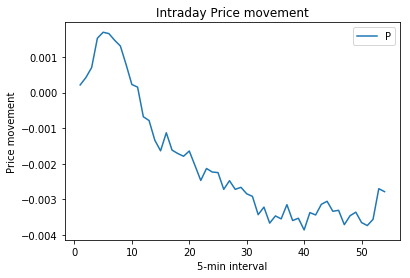

In [35]:
x=pltdata.index
y=pltdata['均價走勢還原']
plt.plot(x,y) 
plt.xlabel("5-min interval")
plt.ylabel("Price movement")
plt.title("Intraday Price movement")
#plt.show()
plt.legend('Price')
plt.savefig("foo.png",bbox_inches='tight')

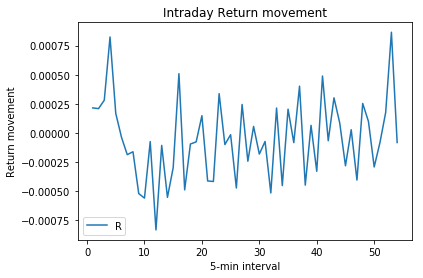

In [36]:
x=pltdata.index
y=pltdata['itvllogR']
plt.plot(x,y) 
plt.xlabel("5-min interval")
plt.ylabel("Return movement")
plt.title("Intraday Return movement")
#plt.show()
plt.legend('Ret')
plt.savefig("foo2.png",bbox_inches='tight')

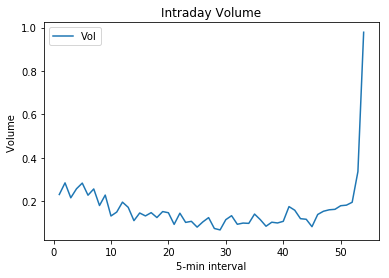

In [37]:
x=pltdata.index
y=pltdata['Vol']
plt.plot(x,y) 
plt.xlabel("5-min interval")
plt.ylabel("Volume ")
plt.title("Intraday Volume")
plt.legend()#收盤有集中競價?
#plt.show()
plt.savefig("vol.png",bbox_inches='tight')

In [38]:
#Data_ans=Data_ans.reset_index(['5_min_group'])
Data_ans=Data_ans.reset_index(['公司'])

In [39]:
Data_ans[(Data_ans['5_min_group']==54)&(Data_ans['公司']=='3045')]

KeyError: '5_min_group'

In [40]:
Data_na[(Data_na['公司']=='3045')& (Data_na['5_min_group']== 54)].groupby(['日期']).sum()

收盤價   成交量  5_min_group       logP  LogReturn       交易額   價差  \
日期                                                                          
2019-09-19  572.5   310          270  23.702874   0.000000   35495.0  0.0   
2019-09-20  570.0  2404          270  23.680992   0.000000  274056.0  0.0   
2019-09-23  569.5   215          270  23.676597  -0.004396   24402.5 -0.5   
2019-09-24  565.0   755          270  23.636939   0.000000   85315.0  0.0   
2019-09-25  565.0   404          270  23.636939   0.000000   45652.0  0.0   
2019-09-26  563.0   362          270  23.619201   0.004435   40906.0  0.5   
2019-09-27  560.0   195          270  23.592494   0.000000   21840.0  0.0   
2019-10-01  565.5   372          270  23.641354   0.004415   42222.0  0.5   
2019-10-02  567.5   186          270  23.659014   0.000000   21111.0  0.0   

                 報酬率  com_day_vol  Itvl_trsf_vol  com_day_dvol  Itvl_trsf_dvol  
日期                                                                              
2019-09-19  0.000000         5105       0.303624      582997.5        0.304418  
2019-09-20  0.000000        16820       0.714625     1918682.5        0.714178  
2019-09-23 -0.004386         9900       0.108586     1126252.5        0.108335  
2019-09-24  0.000000        15175       0.248764     1717397.5        0.248385  
2019-09-25  0.000000        13150       0.153612     1482027.5        0.154019  
2019-09-26  0.004444        11005       0.164471     1241882.5        0.164694  
2019-09-27  0.000000        11490       0.084856     1293312.5        0.084434  
2019-10-01  0.004425         8590       0.216531      973052.5        0.216956  
2019-10-02  0.000000        12180       0.076355     1382520.0        0.076350

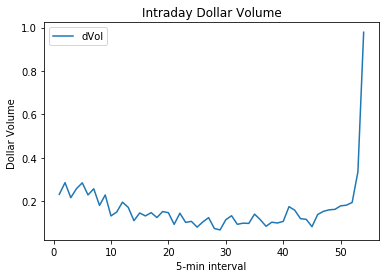

In [41]:
x=pltdata.index
y=pltdata['dVol']
plt.plot(x,y) 
plt.xlabel("5-min interval")
plt.ylabel("Dollar Volume ")
plt.title("Intraday Dollar Volume")
plt.legend()#收盤有集中競價?
#plt.show()
plt.savefig("dvol.png",bbox_inches='tight')







In [42]:
# x=pltdata.index
# y3 =((pltdata['itvllogR']-np.mean(pltdata['itvllogR'])).abs())/np.std((pltdata['itvllogR']-np.mean(pltdata['itvllogR']).abs())
# y4 =(pltdata['Return_std']-np.mean(pltdata['Return_std']))/np.std(pltdata['Return_std'])
     
# plt.plot(x,y3) 
# plt.plot(x,y4) 
# plt.xlabel("5-min interval")
# plt.ylabel("Trading volume and volatility2")
# plt.title("Intraday Trading volume and Volatility")#半小時K線資訊->投資者關注訊息->對資訊的增量評價不一致->交易增加->報酬波動度高
# plt.legend()
# #plt.show()


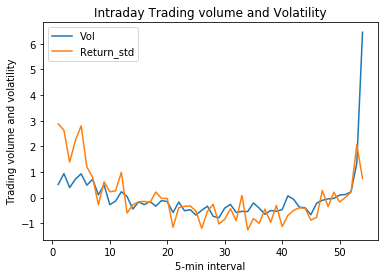

In [43]:
x=pltdata.index
y1=(pltdata['Vol']-np.mean(pltdata['Vol']))/np.std(pltdata['Vol'])
y2=(pltdata['Return_std']-np.mean(pltdata['Return_std']))/np.std(pltdata['Return_std'])
plt.plot(x,y1) 
plt.plot(x,y2) 
plt.xlabel("5-min interval")
plt.ylabel("Trading volume and volatility")
plt.title("Intraday Trading volume and Volatility")#半小時K線資訊->投資者關注訊息->對資訊的增量評價不一致->交易增加->報酬波動度高
plt.legend()
#plt.show()
plt.savefig("doublevol.png",bbox_inches='tight')

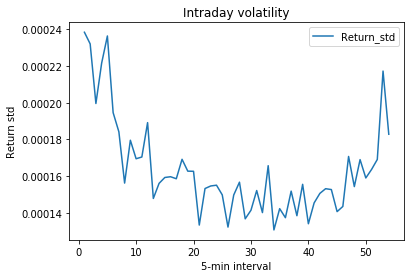

In [44]:
x=pltdata.index
y=pltdata['Return_std']
plt.plot(x,y) 
plt.xlabel("5-min interval")
plt.ylabel("Return std")
plt.title("Intraday volatility")
#plt.show()
plt.legend()
plt.savefig("volatility.png",bbox_inches='tight')

#30分線揭露的下一期

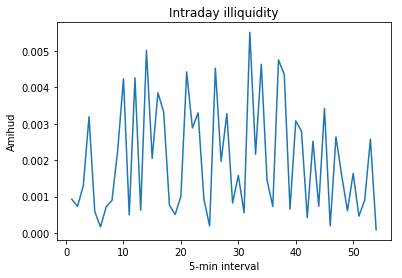

In [45]:
x=pltdata.index
y=pltdata['amihud']
plt.plot(x,y) 
plt.xlabel("5-min interval")
plt.ylabel("Amihud")
plt.title("Intraday illiquidity")

plt.savefig("Amihud.png",bbox_inches='tight')

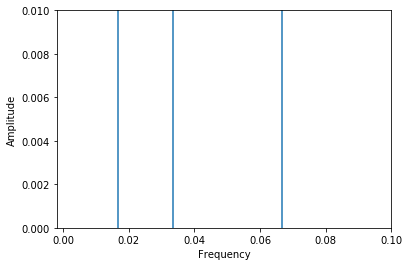

In [1176]:
from scipy.fftpack import fft,fftfreq

f_s=0.2
# x = np.asarray(pltdata['Amihud']-1)
x=y
X = fft(x)

# f_s=0.2
# x = np.asarray(pltdata['Amihud'])
# X = fft(x)

freqs = fftfreq(len(x)) * f_s
freqs =freqs[0:27]
#fig, ax = plt.subplots()
X=np.abs(X[0:27])
plt.plot(freqs, X)
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.xlim(-0.002, f_s / 2)
plt.ylim(0, 0.01)
# plt.annotate('30 mins', xy=(1/30, 23))
# plt.annotate('15 mins', xy=(1/15, 23))
plt.axvline(x=1/30)
plt.axvline(x=1/15)
plt.axvline(x=1/60)
# plt.title("Variance Ratio - Fourier transform spectrum ")
# plt.axvline(x=1/10.7)

In [989]:
Data_ans=Data_ans.reset_index(level=[0,1])

In [1061]:
Data_eff=pd.DataFrame({"LogReturn":Data_na.groupby(['公司','日期','5_min_group'])['LogReturn'].sum()})
#Data_eff=Data_eff.reset_index(level=[1,0])

In [1062]:
Data_eff=Data_eff.reset_index(level=['公司','日期','5_min_group'])

In [1063]:
DailyRet=pd.DataFrame({"DailyReturn":Data_eff.groupby(['公司','日期'])['LogReturn'].sum()})

In [1064]:
 DailyRet=DailyRet.reset_index(level=['公司','日期'])

In [1065]:
 Data_eff=pd.merge(Data_eff, DailyRet, on=['公司','日期'],how='outer')

In [1082]:
Data_eff['R_k3']=Data_eff.groupby(['公司','日期'])['LogReturn'].transform(lambda x: x.rolling(3).sum())
Data_eff['R_k2']=Data_eff.groupby(['公司','日期'])['LogReturn'].transform(lambda x: x.rolling(2).sum())
Data_eff['R_k6']=Data_eff.groupby(['公司','日期'])['LogReturn'].transform(lambda x: x.rolling(6).sum())
Data_eff['R_k12']=Data_eff.groupby(['公司','日期'])['LogReturn'].transform(lambda x: x.rolling(12).sum())

In [1225]:
varr_data=pd.DataFrame(columns=['k_value','itvl','Var_ratio']) 
k_list=[6]

In [1226]:
for j in k_list:
    for i in np.arange(1,Data_eff['5_min_group'].nunique()-(j-1)):
                itvl_var=Data_eff[Data_eff['5_min_group']==i+j-1]['LogReturn'].var()
                exec(f"past_k_var=Data_eff[Data_eff['5_min_group']==i+j-1]['R_k{j}'].var()")
                Var_ratio=past_k_var/(j*itvl_var)
                varr_data=varr_data.append({'k_value': j,'itvl':i+j-1,'Var_ratio':Var_ratio},ignore_index=True)

In [1227]:
varr_data.set_index('itvl', inplace=True)

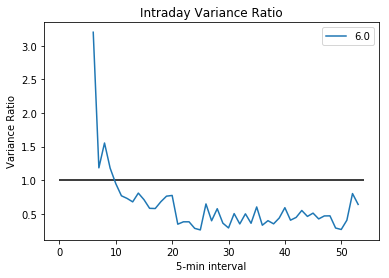

In [1228]:
varr_data.groupby('k_value')['Var_ratio'].plot(legend=True)
plt.hlines(y=1,xmin=0,xmax=54)
plt.xlabel("5-min interval")
plt.ylabel("Variance Ratio")
plt.title("Intraday Variance Ratio")
plt.savefig("varratio.png",bbox_inches='tight')


In [1004]:
Data_eff['報酬率']=[np.exp(i)-1 for i in Data_eff['LogReturn']]

In [1220]:
varr_data

k_value  Var_ratio
itvl                    
2.0       2.0   1.047896
3.0       2.0   1.298477
4.0       2.0   0.679119
5.0       2.0   1.875257
6.0       2.0   1.236819
7.0       2.0   0.825891
8.0       2.0   0.972065
9.0       2.0   0.637723
10.0      2.0   0.483456
11.0      2.0   0.775480
12.0      2.0   0.705953
13.0      2.0   0.888547
14.0      2.0   0.782748
15.0      2.0   0.668547
16.0      2.0   1.077928
17.0      2.0   0.762032
18.0      2.0   0.836991
19.0      2.0   0.913565
20.0      2.0   0.816653
21.0      2.0   0.630449
22.0      2.0   1.074334
23.0      2.0   0.831341
24.0      2.0   0.563124
25.0      2.0   0.750174
26.0      2.0   1.164912
27.0      2.0   0.628176
28.0      2.0   1.057391
29.0      2.0   0.403982
30.0      2.0   0.605728
31.0      2.0   1.103505
32.0      2.0   0.483989
33.0      2.0   0.845931
34.0      2.0   0.633371
35.0      2.0   0.621624
36.0      2.0   0.799855
37.0      2.0   0.727062
38.0      2.0   0.630060
39.0      2.0   0.769990
40.0      2.0   0.831895
41.0      2.0   0.486586
42.0      2.0   0.616532
43.0      2.0   0.704688
44.0      2.0   0.692497
45.0      2.0   0.663095
46.0      2.0   0.732441
47.0      2.0   0.992168
48.0      2.0   0.782572
49.0      2.0   0.725585
50.0      2.0   0.678539
51.0      2.0   0.699361
52.0      2.0   0.877418
53.0      2.0   0.796773

In [1005]:
Data_Efficiency=Data_eff.pivot_table(index=['公司', '日期'], columns='5_min_group',values='報酬率')

In [1006]:
Data_Efficiency=Data_Efficiency.reset_index(level=[0,0])

In [1007]:
corr_mat=Data_Efficiency.corr()

In [1008]:
corr_1=pd.DataFrame(columns=['itvl','corr'])
for i in range(53):
    corr_1=corr_1.append({'itvl':i+1,'corr':Data_Efficiency.corr().iloc[i,i+1]},ignore_index=True)

In [36]:
 x=corr_1['itvl']
 y=corr_1['corr']
 plt.plot(x,y)
 plt.xlabel("5-min interval")
 plt.ylabel("1 period autocorrelation")
 plt.title("Intraday autocorrelation(delta=1)")
 plt.hlines(y=0,xmin=0,xmax=54)
plt.savefig("autocorr_1.png",bbox_inches='tight')

NameError: name 'corr_1' is not defined

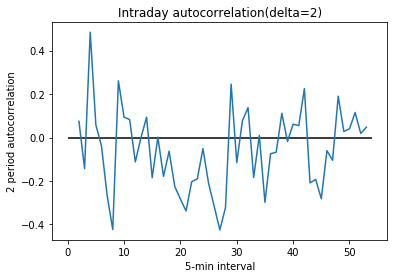

In [1147]:
corr_2=pd.DataFrame(columns=['itvl','corr'])
for i in range(52):
    corr_2=corr_2.append({'itvl':i+2,'corr':Data_Efficiency.corr().iloc[i,i+2]},ignore_index=True)

x=corr_2['itvl']
y=corr_2['corr']
plt.plot(x,y)
plt.xlabel("5-min interval")
plt.ylabel("2 period autocorrelation")
plt.title("Intraday autocorrelation(delta=2)")
plt.hlines(y=0,xmin=0,xmax=54)
plt.savefig("autocorr_2.png",bbox_inches='tight')

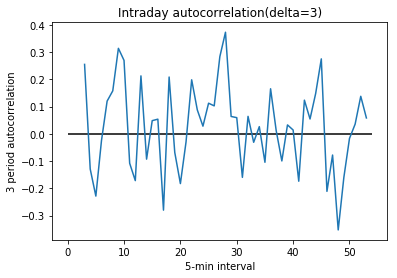

In [1148]:
corr_3=pd.DataFrame(columns=['itvl','corr'])
for i in range(51):
    corr_3=corr_3.append({'itvl':i+3,'corr':Data_Efficiency.corr().iloc[i,i+3]},ignore_index=True)

x=corr_3['itvl']
y=corr_3['corr']
plt.plot(x,y)
plt.xlabel("5-min interval")
plt.ylabel("3 period autocorrelation")
plt.title("Intraday autocorrelation(delta=3)")
plt.hlines(y=0,xmin=0,xmax=54)
plt.savefig("autocorr_3.png",bbox_inches='tight')

In [1012]:
#R-squaredes
import statsmodels.api as sm

In [1013]:
Data_eff['Ret_d1']=Data_eff.groupby(['公司','日期'])['報酬率'].shift(1)
Data_eff['Ret_d2']=Data_eff.groupby(['公司','日期'])['報酬率'].shift(2)
Data_eff['Ret_d3']=Data_eff.groupby(['公司','日期'])['報酬率'].shift(3)

In [1014]:
sltdata=Data_eff[['Ret_d3','Ret_d2','Ret_d1','報酬率']].dropna()

In [1149]:
y=sltdata['報酬率']
x=sltdata[['Ret_d1','Ret_d2','Ret_d3']]
model = sm.OLS(y, x).fit()
model.summary()#第一期顯著負相關,#第二期以後相關性低
#跑多變量線性迴歸?

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    報酬率   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     39.22
Date:                Sat, 05 Oct 2019   Prob (F-statistic):           8.20e-25
Time:                        15:23:35   Log-Likelihood:                 12763.
No. Observations:                2754   AIC:                        -2.552e+04
Df Residuals:                    2751   BIC:                        -2.550e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Ret_d1        -0.2024      0.019    -10.541      0.000      -0.240      -0.165
Ret_d2        -0.0707      0.019     -3.672      0.000      -0.108      -0.033
Ret_d3         0.0157      0.018      0.849      0.396      -0.020       0.052
==============================================================================
Omnibus:                      667.873   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10218.727
Skew:                           0.724   Prob(JB):                         0.00
Kurtosis:                      12.325   Cond. No.                         1.31
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""